In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [8]:
img = cv.imread('./Resources/Photos/cat.jpg') # 'imread' helps us read an image as a matrix of pixels
print(img.shape)
cv.imshow(winname='Cat', mat=img) # Displays the matrix as photo
cv.waitKey(0) # It is a keyboard binding function which displays the photo unless the window is closed

(427, 640, 3)


-1

In [3]:
# Reading videos
capture = cv.VideoCapture('./Resources/Videos/dog.mp4')

while True:
    isTrue, frame = capture.read() # Reading video frame by frame
    cv.imshow(winname='Dog Video', mat=frame)
    if cv.waitKey(20) & 0xFF==ord('d'): # The integer passed inside 'waitKey' controls speed of video and other condition stops the video if 'D' key is pressed
        break
capture.release()
cv.destroyAllWindows()

In [9]:
# Rescaling and Resizing the images
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1]*scale) # 'frame' is a numpy array
    height = int(frame.shape[0]*scale)
    dim = (width, height)
    return cv.resize(frame, dim, interpolation=cv.INTER_AREA)

capture = cv.VideoCapture('./Resources/Videos/dog.mp4')

while True:
    isTrue, frame = capture.read()
    frame_resized = rescaleFrame(frame=frame)
    cv.imshow(winname='Dog Video', mat=frame_resized)
    if cv.waitKey(20) & 0xFF==ord('d'):
        break
capture.release()
cv.destroyAllWindows()

In [24]:
# Drawing shapes inside an image
blank = np.zeros((500, 600, 3), dtype='uint8')

cv.rectangle(blank, (150, 300), (blank.shape[1]//2, blank.shape[0]//2), (0, 155, 30), thickness=2) # To get a filled rectangle we can pass 'thickness=-1' OR 'thickness=cv.FILLED'

cv.circle(blank, (250, 250), radius=85, color=(150, 0, 150), thickness=3)

cv.line(blank, (0, 0), (300, 350), color=(255, 255, 155), thickness=4)

cv.putText(blank, "Hello World!", (300, 50), fontFace=cv.FONT_HERSHEY_TRIPLEX, fontScale=1.0, color=(255, 0, 0), thickness=2)

cv.imshow(winname='Cat', mat=blank)
cv.waitKey(0)

-1

In [36]:
# 5 Essential functions in OpenCV
# In all the functions below, dimensions are in the format (width, height)
img = cv.imread('./Resources/Photos/park.jpg')

# 1. Converting a BGR Color image to GrayScale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow(winname='Gray', mat=gray)

# 2. Blur
blur = cv.GaussianBlur(img, (3,3), cv.BORDER_DEFAULT) # To increase the blur intensity, we can increase the kernel size
# cv.imshow(winname='Blur', mat=blur)

# 3. Finding edges in an image
canny = cv.Canny(blur, 150, 200)
# cv.imshow(winname='Canny', mat=canny)

# 4. Dilating the image (Gradually enlarging the object boundaries)
dilated = cv.dilate(canny, (5,5), iterations=3)
# cv.imshow(winname='Dilated', mat=dilated)

# 5. Eroding an image (Reverse of dilating)
eroded = cv.erode(dilated, (5,5), iterations=3)
# cv.imshow(winname='Eroded', mat=eroded)

# Resizing and Cropping the image
resized = cv.resize(img, (250,250))
cropped = img[50:250, 250:400]
cv.imshow('Resized', resized)
cv.imshow('Cropped', cropped)

cv.imshow(winname='Cat', mat=img)
cv.waitKey(0)

-1

In [19]:
# Image Transformations

# 1. Translation (Moving image on x and y axes)
img = cv.imread('./Resources/Photos/park.jpg')

def translate(img, x_shift, y_shift):
    transMat = np.float32([[1,0,x_shift], [0,1,y_shift]]) # This is our "Affine Transformation Matrix"
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

translated = translate(img, 100, 150) # -y: UP, +y: DOWN, -x: LEFT, +x:RIGHT
# cv.imshow('Translated', translated)

# 2. Rotation
def rotate(img, angle, point):
    (width, height) = img.shape[:2]
    if not point:
        point = (width//2, height//2)
    rotMat = cv.getRotationMatrix2D(point, angle, 1.0)
    dim = (width, height)
    return cv.warpAffine(img, rotMat, dim)

rotated = rotate(img, 90, None)
# cv.imshow('Rotated', rotated)

# 3. Resize
resized = cv.resize(img, (400,300))
# cv.imshow('Reseized', resized)

# 4. Flipping
flipped = cv.flip(img, -1)
# cv.imshow('Flipped', flipped)

# 5. Cropping
cropped = img[200:350, 400:500]
cv.imshow('Cropped', cropped)

cv.waitKey(0)

-1

In [2]:
# Contours Detection
img = cv.imread('./Resources/Photos/cats.jpg')
blank = np.zeros(img.shape, dtype='uint8')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)

# 1. Using Canny function
canny = cv.Canny(blur, 125, 175) # Gives us all the edges in the image

# 2. Thresholding means Binarizing an image (either 0 or 1)
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY) # If a pixel value in the image is below 125, it sets it to Black and if it's above 125 it sets it to white
cv.imshow('Threshold Contours', thresh)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE) # Image, Retrieval mode, contour approximation method (Eg If set to NONE, it will return all the points on the boundaries of a contour while if set to SIMPLE, it will return just the endpoints or important points required to display the contour)

cv.drawContours(blank, contours, -1, (0,0,255), 1)
cv.imshow('Contours', blank)

# print(len(contours), len(contours[0]))

cv.waitKey(0)

In [5]:
# Color Models
# OpenCV uses BGR color model but other Python libraries use RGB color model
img  = cv.imread('./Resources/Photos/park.jpg')

# BGR to Grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray', gray)

# BGR to HSV (Hue Saturation Value)
hsv =  cv.cvtColor(img, cv.COLOR_BGR2HSV)
# cv.imshow('HSV', hsv)

# BGR to LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
# cv.imshow('LAB', lab)

# BGR to RGB
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# cv.imshow('RGB', rgb)

# We have functions to go back from HSV, Grayscale, LAB to BGR not directly from LAB to HSV or any other color models. We first have go to BGR and then convert it ahead. 

cv.waitKey(0)

-1

In [7]:
# Color Channels
img  = cv.imread('./Resources/Photos/park.jpg')

# b, g and r are the grayscale images in which low density area means that particular color is present and high density area represent absence of that color or empty.
b, g, r = cv.split(img)
cv.imshow('Image', img)
# cv.imshow('Blue', b)
# cv.imshow('Green', g)
# cv.imshow('Red', r)

# We can also show the actual color channel of an image as follows
blank = np.zeros(img.shape[:2], dtype='uint8')
blue = cv.merge([b, blank, blank])
green= cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])
cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)

cv.waitKey(0)

-1

In [6]:
# Smoothing/Blurring -  The images which we get generally have a lot of noise in them and blurring helps us reduce that noise

img = cv.imread('./Resources/Photos/cats.jpg')

# Averaging
average = cv.blur(img, ksize=(5,5)) # This replaces each pixel in a window with the average pixel value of that window (Remember window and kernel and how kernel slides)
cv.imshow('Average Blur', average)

# Gaussian Blur - It uses a Gaussian distribution of weights where as in average blur we use evenly distributed weights
# It is better than Average Blur
gauss = cv.GaussianBlur(img, (5,5), 0)
cv.imshow('Gaussian Blur', gauss)

# Median Blur
median = cv.medianBlur(img, 5)
cv.imshow('Median Blur', median)

# Bilateral Blur - This blur retains the edges in an image
bilat = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow('Bilateral Blur', bilat)

cv.waitKey(0)

-1

In [2]:
# Bitwise operations
blank = np.zeros((400,400), dtype='uint8')

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200, 200), 200, 255, -1)

bit_and = cv.bitwise_and(rectangle, circle) # Returns the intersecting regions between images
bit_or = cv.bitwise_or(rectangle, circle) # Returns both intersecting and non-intersecting regions between images
bit_xor = cv.bitwise_xor(rectangle, circle) # Returns the non-intersecting regions between images
bit_not = cv.bitwise_not(rectangle)

# cv.imshow('Bitwise AND', bit_and)
# cv.imshow('Bitwise OR', bit_or)
# cv.imshow('Bitwise XOR', bit_xor)
cv.imshow('Bitwise NOT', bit_not)

cv.waitKey(0)

-1

In [6]:
# Masking - It helps us concentrate only on the interested regions of image, e.g. Faces in Face Recognition model
img = cv.imread('./Resources/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape[:2], dtype='uint8') # Mask and the image dimensions SHOULD always be same

circle = cv.circle(blank.copy(), (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)

mask = cv.bitwise_and(circle, rectangle)
masked_img = cv.bitwise_and(img, img, mask=mask)
cv.imshow('Masked Image', masked_img)

cv.waitKey(0)

-1

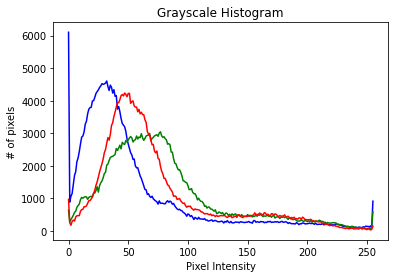

-1

In [18]:
# Histogram Computation - Plotting a histogram of number of pixels vs Pixel intensities
img = cv.imread('./Resources/Photos/cats.jpg')
# cv.imshow('Cats', img)

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# # cv.imshow('Grayscale Image', gray)

# circle = cv.circle(blank.copy(), (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
# mask = cv.bitwise_and(gray, gray, mask=circle)

# hist = cv.calcHist([gray], [0], mask, [256], [0,256])

# plt.figure()
# plt.title('Grayscale Histogram')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('# of pixels')
# plt.plot(hist)
# plt.show()

# Plotting a histogram for the color image
colors = ['b', 'g', 'r']
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('# of pixels')

for i, col in enumerate(colors):
    hist = cv.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
plt.show()
cv.waitKey(0)

In [4]:
# Thresholding and Binarising

img = cv.imread('./Resources/Photos/cats.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# cv.imshow('Gray Image', gray)

# Simple Thresholding - Simply convert pixels with values above and below threshold as white and black respectively
threshold, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
cv.imshow('Simple Threshold', thresh)
threshold, inv_thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV)
# cv.imshow('Simple Threshold', inv_thresh)

# Adaptive Thresholding - Here the function finds the optimal threshold value, we don't pass a threshold value
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 7, 3)
cv.imshow('Adaptive Threshold', adaptive_thresh)

cv.waitKey(0)

-1

In [6]:
# Edge Detection

img = cv.imread('./Resources/Photos/park.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Laplacian
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow('Laplacian Edges', lap)

# Sobel - It can compute the gradient in 2 different directions, X and Y
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)
cv.imshow('Combined Sobel', combined_sobel)

# Canny - It gives us the most accurate edges and it is a more advanced algorithm than other two
canny = cv.Canny(gray, 125, 175)
cv.imshow('Canny', canny)

cv.waitKey(0)

-1